<h1 style="padding-top: 25px;padding-bottom: 25px;text-align: left; padding-left: 10px; background-color: #DDDDDD; 
    color: black;"> <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science </h1>

## Homework 1: Data Collection - Web Scraping - Data Parsing

**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner



<hr style='height:2px'>

In [2]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- The deliverables to be submitted in Canvas are: <br/>
    a) this python notebook with your code and answers<br/>
    b) the bibtex file, `publist.bib`, you created<br/>
    c) the CSV file, `publist.csv`, you created <br/>
    d) The JSON file, `publist.json` you created<br/>
    
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of 10 seconds between requests in your code. This helps not to get blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). 
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.



# Data Collection - Web Scraping - Data Parsing 
 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you will read the data from a file, and then later scrape them directly from a website. You will look for specific pieces of information by parsing the data, clean the data to prepare them for analysis, and finally, answer some questions.

In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML.
- JavaScript Object Notation (JSON), a text-based open standard designed for transmitting structured data over the web.

In [3]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

## Help a professor parse their publications and extract information.

### Overview

In this part your goal is to parse the HTML page of a professor containing some of his/her publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 45 publications in descending order from No. 244 to No. 200.


In [4]:
# use this file 
PUB_FILENAME = 'data/publist_super_clean.html'

<div class='exercise'><b> Question 1 [40 pts]: Parsing and Converting to bibTex and CSV using Beautiful Soup and python string manipulation </b></div>

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which looks roughly like this (we've simplified a few things):
```
@article { 
     author = "John Doyle",
     title = "Interaction between atoms",
     URL = "Papers/PhysRevB_81_085406_2010.pdf",
     journal = "Phys. Rev. B",
     volume = "81"
}
```
You will notice that this file format is a set of items, each of which is a set of key-value pairs. In the python world, you can think of this as a list of dictionaries.
Each line is an item, and has multiple features, or keys, as represented by that line's value for the column corresponding to the key.

You are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex and .CSV formats. A useful tool for parsing an .html file is BeautifulSoup  (http://www.crummy.com/software/BeautifulSoup/) (BS), which makes parsing HTML a lot easier.

**1.1 [5 pts]** Write a function called `make_soup` that accepts `filename` for the HTML filename as an input and returns a BS object.
    
**1.2 [25 pts]** Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should correspond to one paper and should have the following format (with different values for each publication):
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```


**1.3 [5 pts]** Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.

**1.4 [5 pts]** Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index for the rows.

    
#### HINT 
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper.  The `find_all` method of BeautifulSoup might be useful.
- Question 1.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper. 
- Question 1.3 is effectively tackled by first using python string formatting on a template string.
- Make sure you catch exceptions when needed. 
- Make sure you check for **missing data** and handle these cases as you see fit. 


#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>
    
### Answers 

In [5]:
# import the necessary libraries 
from bs4 import BeautifulSoup

 **1.1 [5 pts]  Write a function called `make_soup` that accepts `filename` for the HTML filename as an input and returns a BS object.**
    

In [6]:
def make_soup(filename: str) -> BeautifulSoup: 
    '''Open the file and convert into a BS object. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A BS object containing the HTML page ready to be parsed.
    '''
    # open(filename) opens input, BeautifulSoup function converts into BS object 
    soup = BeautifulSoup(open(filename), 'html.parser')
    
    return soup
   

In [7]:
# check your code - print the BS object, you should get a familiar HTML page as text
soup = make_soup(PUB_FILENAME)

print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efth

Your output should look **like** this:
```
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li>
</ol>

...

```

**1.2 [25 pts] Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should correspond to one paper and should have the following format (with different values for each publication):**
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```

In [8]:
# Function that reads in the BS object

# How it's listed in HTML: href (url), title, author(s), journal, volume 

# practice for figuring out function

# Parse for author
list1 = soup.find_all('li')[1]  # first <li> object
list1.contents[4].strip()  # author is in fifth element of this list soup.find_all('li')[1]contents[4].strip()
# doesn't work in one line

# Parse for title
title_list = soup.find_all('a') # parse through this list of all links and titles
title_list[1].text.strip()  # get text of that title soup.find_all('a').text.strip()

# Parse for URL
link_list = soup.find_all('a') # parse through this list of all links and titles
link_list[1]['href']  # how to get one element of the link list, href is an attribute of the a tag
# soup.find_all('a')[1]['href']

# Parse for Journal
journal_list = soup.find_all('i') # parse through this list of all the journals
journal_list[1].text.strip()  # get text of that journal soup.find_all('i')[1].text.strip()

# Parse for Volume
volume_list = soup.find_all('b')  # parse through this list of all the volumes
volume_list[1].text              # get text of volume soup.find_all('b')[1].text

'84'

Author Function

In [9]:
def get_author(bs_object, index):
    
    li_object = bs_object.find_all('li')[index]  # nth <li> object
    #print(li_object)
    author = li_object.contents[4].strip().strip(',')  # NOT WORKING HERE author is in fifth element of this list
    
    return author

# test
first_author = get_author(soup, 0)
first_author

'Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng'

Title Function

In [10]:
def get_title(bs_object, index):
    title_list = bs_object.find_all('a') # parse through this list of all links and titles
    title = title_list[index].text.strip().strip('""') 
    
    return title

# test
first_title = get_title(soup, 0)
first_title

'Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons'

URL Function

In [11]:
def get_url(bs_object, index):
    link_list = bs_object.find_all('a') # parse through this list of all links and titles
    url = link_list[index]['href'] 
    
    return url

# test
first_url = get_url(soup, 0)
first_url

'Papers/2011/PhysRevB_84_125411_2011.pdf'

Journal Function

In [12]:
def get_journal(bs_object, index):
    journal_list = bs_object.find_all('i') # parse through this list of all the journals
    journal = journal_list[index].text.strip()  
    
    return journal

# test
first_journal = get_journal(soup, 0)
first_journal

'PHYSICAL REVIEW B'

Volume Function

In [13]:
def get_volume(bs_object, index):
    
    volume_list = bs_object.find_all('b')  # parse through this list of all the volumes
    volume = volume_list[index].text 
        
    return volume

    

# test
first_volume = get_volume(soup, 0)
first_volume

'84'

Main Function - takes in BS object, return list of dictionaries

In [14]:
def make_list_of_dicts(bs_object):
    
    # initialize empty list to fill with dictionaries
    list_of_dicts = []
    
    # iterate through all the <li> objects of the bs_object
    for i in range(0, len(bs_object.find_all('li'))):
        
        # intialize dictionary
        dict_i = {}
        
        # get values of dictionary
        author_i = get_author(bs_object, i)
        title_i = get_title(bs_object, i)
        url_i = get_url(bs_object, i)
        journal_i = get_journal(bs_object, i)
        
        # I figured out that the 19th entry has no volume
        # I couldn't figure out how to incorporate looking for this in my code so I hard coded it
        
        if i < 18:
            volume_i = get_volume(bs_object, i)  # everything is normal for entries until the 19th one
        elif i == 18:
            volume_i = ' '           # need to include no volume for this entry
        elif i > 18:
            volume_i = get_volume(bs_object, i-1)   # there is no skip in volume function so it is one index behind
        
        
        # fill in dictionary with keys and values
        dict_i['author'] = author_i
        dict_i['title'] = title_i
        dict_i['url'] = url_i
        dict_i['journal'] = journal_i
        dict_i['volume'] = volume_i
        
        # append dictionary to list
        list_of_dicts.append(dict_i)
    
    
    return list_of_dicts

# test
my_list_of_dicts = make_list_of_dicts(soup)
my_list_of_dicts

[{'author': 'Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng',
  'title': 'Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons',
  'url': 'Papers/2011/PhysRevB_84_125411_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '84'},
 {'author': 'JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng',
  'title': 'Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles',
  'url': 'Papers/2011/PhysRevB_84_035325_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '84'},
 {'author': 'Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras',
  'title': 'Influence of CH2 content and network defects on the elastic properties of organosilicate glasses',
  'url': 'Papers/2011/PhysRevB_83_054204_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '83'},
 {'author': 'Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali',
  'title': 'Direct correlat

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.3
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Didn't format very nicely
</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>-1</span></div></div>

**1.3 [5 pts] Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.**



In [415]:
# emulated code from 
# https://bibtexparser.readthedocs.io/en/v0.6.2/tutorial.html#preparing-a-bibtex-file
with open('publist.bib', 'w+') as bibfile:
    for i in range(0, len(my_list_of_dicts)):
         bibfile.write('@article%d = %s ' % (i, my_list_of_dicts[i]))


**1.4 [5 pts] Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index.** 

In [420]:
import csv

# creating pandas dataframe
df = pd.DataFrame(my_list_of_dicts)

# emulated code from
# https://datatofish.com/export-dataframe-to-csv/
export_csv = df.to_csv (r'publist.csv', index = None, header=True)

<hr style='height:2px'>

## Follow the stars in IMDb's list of "The Top 100 Stars for 2017" 

### Overview
In this part, your goal is to extract information from IMDb's Top 100 Stars for 2017 (https://www.imdb.com/list/ls025814950/) and perform some analysis on each star in the list. In particular we are interested to know: 
+ how many performers made their first movie at age 17? 
+ how many performers started as child actors? 
+ who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? 

These questions are addressed in more details in the questions below. 



<div class='exercise'><b> Question 2 [60 pts]: Web Scraping using Beautiful Soup and exploring using Pandas </b></div>

**2.1 [5 pts]** Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are (1 or 2 sentences for each):

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**2.2 [5 pts]** Create a Beautiful Soup object named `star_soup` using `my_page` as input.

**2.3 [15 pts]** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below). The order of dictionaries does not matter. One of the fields of this dictionary is the `url` of each star's individual page, which you need to save in the `page` field. Note that there is a ton of information about each star on these webpages. Each dictionary corresponds to a star profile and it should have the following data:

```
name: the name of the actor/actress as it appears at the top
gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
url: the url of the link under their name that leads to a page with details
page: BS object with html text acquired by scraping the above 'url' page' 
```


**2.4 [15 pts]** Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.

   
**2.6 [10 pts]** We provide a JSON file called `data/staff_starinfo.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file  into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_movie`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.

**2.7 [6 pts]** You are now ready to answer the following intriguing questions: 
- **2.7.1** How many performers made their first appearance (movie or TV) when he/she was 17 years old?

- **2.7.2** How many performers started as child actors? Define child actor as a person younger than 12 years old. 

**2.8 [2 pts]** Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? Define **most prolific** as the performer with the most credits.
    
**2.9 [2 pts]** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.
     
### Hints
- Create a variable that groups actors/actresses by the age of their first movie. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply operations to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year has some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these in a reasonable fashion before performing calculations on the data. 
- You should include both movies and TV shows.
    
### Resources
- The `requests` library makes working with HTTP requests easy. For more on the `requests` library see http://docs.python-requests.org/

### Answers

In [17]:
import requests

**2.1 [5 pts] Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are (1 or 2 sentences for each):**

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.


In [18]:
my_page = requests.get('https://www.imdb.com/list/ls025814950/')
print(my_page.text)





<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>Top 100 Stars of 2017 - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld

The my_page.text attribute gets all the text, including the tags, in the html document of my_page and outputs it as a string.
The my_page.status_code attribute prints out the error code associated with the page; in this case, it returns 200 which means that we were successful in retrieving the page.
The my_page.content attribute gets all the tags and their contents, but not in string format.


**2.2 [5 pts] Create a Beautiful Soup object named `star_soup` using `my_page` as input.**


In [19]:
star_soup = BeautifulSoup(my_page.text, 'html.parser')

In [20]:
# check your code - you should see a familiar HTML code
print (star_soup.prettify()[:])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2017 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {w

**2.3 [15 pts] Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below)....**

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: BS object with 'html text acquired by scraping the above 'url' page' 

Example:
--------
{'name': Tom Hardy,
  'gender': 0,
  'url': https://www.imdb.com/name/nm0362766/?ref_=nmls_hd,
  'page': BS object with 'html text acquired by scraping the 'url' page'
}

```

In [ ]:
# List of celebrity profiles is under a div class called "lister-list" - want to do star_soup.select('.lister-list')?
# star_soup.select('.lister-list') just gives a list with one element
# Each celebrity profile is its own div class "lister-item mode-detail"

# How to get the name - each name is in a tag within h3 tag
star_soup.find_all('h3') # all the names, index this
star_soup.find_all('h3')[0].contents[3]  # the name, store in a variable, don't change contents
# add .text.strip() to get the name!

# How to get the gender - each gender is in a p tag
star_soup.find_all('p', {'class':'text-muted text-small'})  # all the p tags, index this
star_soup.find_all('p', {'class':'text-muted text-small'})[0].contents[0]  # the name, store in a variable, don't change contents
# add .strip() to get the gender!
# then add if statement to change to 0 and 1
if p_class.strip() == 'Actor':
    print('0')  # may change print to store in a variable or smth
else:
    print('1')
    
# How to get the url
star_profile = star_soup.find_all('div', {'class':'lister-item mode-detail'})[0]  # get the star's profile, change index
name_url = star_profile.find_all('a')[0]['href']  # stores the url from the first <a> tag
name_url_list = ['https://www.imdb.com', name_url,'?ref_=nmls_hd']  # puts all parts of the url in the list for join
final_url = ''.join(name_url_list)       # stores final url 

# How to get the page as a bs object, needs star's url as input in place of final_url
star_page_url = requests.get(final_url)
star_page_soup = BeautifulSoup(star_page_url.text, 'html.parser')  # return star_page_soup

Name Function

In [130]:
def get_star_name(bs_object, index):
    
    name_tag = bs_object.find_all('h3')[index].contents[3]  # the name, store in a variable, don't change contents
    # add .text.strip() to get the name!
    name = name_tag.text.strip()
    
    return name

# test
first_star_name = get_star_name(star_soup, 0)
first_star_name

'Gal Gadot'

Gender Function

In [132]:
def get_star_gender(bs_object, index):
    
    # the name, store in a variable, don't change contents
    p_tag = bs_object.find_all('p', {'class':'text-muted text-small'})[index].contents[0]
    # add .strip() to get the gender!
    
    # then add if statement to change to 0 and 1
    if p_tag.strip() == 'Actor':
        return '0'
    else:
        return '1'
    
# test
first_star_gen = get_star_gender(star_soup, 0)
first_star_gen
# another one
second_star_gen = get_star_gender(star_soup, 1)
second_star_gen

'0'

Url Function

In [136]:
def get_star_url(bs_object, index):
    
    # get the star's profile, change index
    star_profile = bs_object.find_all('div', {'class':'lister-item mode-detail'})[index]
    
    name_url = star_profile.find_all('a')[0]['href']  # stores the url from the first <a> tag
    
    name_url_list = ['https://www.imdb.com', name_url,'?ref_=nmls_hd']  # puts all parts of the url in the list for join
    
    final_url = ''.join(name_url_list)       # stores final url 
    
    return final_url

# test
first_star_url = get_star_url(star_soup, 0)
first_star_url

'https://www.imdb.com/name/nm2933757/?ref_=nmls_hd'

Page Function

In [ ]:
def get_star_page(some_url):
    
    star_page_url = requests.get(some_url)
    star_page_soup = BeautifulSoup(star_page_url.text, 'html.parser')  # return star_page_soup
    
    return star_page_soup

# test
first_star_soup = get_star_page(first_star_url)
first_star_soup

Main Function

In [142]:
# your code here 
def parse_stars(bs_object):
    
    # initialize list to be filled with dictionaries
    list_of_dicts = []
    
    # for loop to parse through profiles
    for i in range(0,len(star_soup.find_all('div', {'class':'lister-item mode-detail'}))):
        
        # create dicitonary
        star_dict_i = {}
        
        # get values 
        star_dict_i['name'] = get_star_name(bs_object, i)
        
        star_dict_i['gender'] = get_star_gender(bs_object, i)
        
        # storing this value separately to use in page function
        star_i_url = get_star_url(bs_object, i)
        
        star_dict_i['url'] = star_i_url
        
        star_dict_i['page'] = get_star_page(star_i_url)
        
        # append dictionary to list
        list_of_dicts.append(star_dict_i)
        
        # adding this pause at the end of loop, pauses before going to the next star
        time.sleep(1)
    
    return list_of_dicts

starlist = parse_stars(star_soup)

This should give you 100

In [143]:
len(starlist)

100

In [254]:
# check your code
# this list is large because of the html code into the `page` field
# to get a better picture, print only the first element
starlist[0]

{'name': 'Gal Gadot',
 'gender': '1',
 'url': 'https://www.imdb.com/name/nm2933757/?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Gal Gadot - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <script>
     if (typeof uet == 'function') {
       uet("be", "LoadTitle", {wb: 1});
     }
 </script>
 <script>

Your output should look like this:
```
{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 
... 


 ```

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q2.4
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Need to deal with edge/cases and missing entries
</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>-1</span></div></div>

**2.4 [15 pts] Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.**

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_movie: title of their first movie or TV show
    year_first_movie: the year they made their first movie or TV show
    credits: number of movies or TV shows they have made in their career.
    
--------
Example:

{'star_name': Tom Hardy,
  'gender': 0,
  'year_born': 1997,
  'first_movie' : 'Batman',
  'year_first_movie' : 2017,
  'credits' : 24}
  
```

In [ ]:
# Celebrity year_born should be in <div id='name-born-info' class = 'txt-block'>, under h4, under second a tag
stari_soup = starlist[0]['page']          # access star's page, CHANGE THIS INDEX...
# go into correct div, into time tag, then into second href text (don't change these indeces)
year_born_tag = stari_soup.find_all('div', {'class':'txt-block'})[1].contents[3].contents[3]   
# get year without tag
year_born_tag.text

# How to get first movie - each star's movie is in a div with class = 'filmo-category-section'
stari_soup = starlist[0]['page']          # access star's page, CHANGE THIS INDEX...
# go into first section, then first movie/tv info, then first movie tag (don't change these indeces)
movie_tag = stari_soup.find_all('div', {'class':'filmo-category-section'})[0].contents[-2].contents[3]
movie_tag.text

# How to get year of first movie - go into movie's div and get span tag?
stari_soup = starlist[0]['page']          # access star's page, CHANGE THIS INDEX...
# go into first section, then first movie/tv info, then first movie year tag (don't change these indeces)
movie_year_tag = stari_soup.find_all('div', {'class':'filmo-category-section'})[0].contents[-2].contents[1]
movie_year_tag.text.strip()

# How to get credits - should be in div with class 'filmo-head-actor' in text after a tag
stari_soup = starlist[0]['page']          # access star's page, CHANGE THIS INDEX...
# go into header with section info, then into credit info
credit_tag = stari_soup.find_all('div', {'class':'head'})[0].contents[-1]
credit_tag.strip()[1:3]

Year Born Function

In [340]:
def get_year_born(list_input, index):
    
    # Celebrity year_born is found in <div id='name-born-info' class = 'txt-block'>, under h4, under second a tag
    
    # access the soup
    stari_soup = list_input[index]['page'] 

    if len(stari_soup.find_all('div', {'class':'txt-block'})) != 1:
        
        if len(stari_soup.find_all('div', {'class':'txt-block'})[1].contents[3].contents) == 3:
            
            # go into correct div, into time tag, then into second href text (don't change these indeces)
            year_born_tag = stari_soup.find_all('div', {'class':'txt-block'})[1].contents[3].contents[1]   
            
            # return year without tag
            return year_born_tag.text
        
        elif len(stari_soup.find_all('div', {'class':'txt-block'})[1].contents[3].contents) == 4:
            
            # go into correct div, into time tag, then into second href text (don't change these indeces)
            year_born_tag = stari_soup.find_all('div', {'class':'txt-block'})[1].contents[3].contents[2]   
            
            # return year without tag
            return year_born_tag.text
        
        elif len(stari_soup.find_all('div', {'class':'txt-block'})[1].contents[3].contents) == 5:
            
            # go into correct div, into time tag, then into second href text (don't change these indeces)
            year_born_tag = stari_soup.find_all('div', {'class':'txt-block'})[1].contents[3].contents[3]   
            
            # return year without tag
            return year_born_tag.text
    
    else:
        return ' '
    

# test
first_year_born = get_year_born(starlist, 0)
first_year_born

'1985'

First Movie Function

In [241]:
def get_first_movie(list_input, index):
    
    # each star's movie is in a div with class = 'filmo-category-section'
    
    # access the soup
    stari_soup = list_input[index]['page']
    
    # go into first section, then first movie/tv info, then first movie tag (don't change these indeces)
    movie_tag = stari_soup.find_all('div', {'class':'filmo-category-section'})[0].contents[-2].contents[3]

    return movie_tag.text

# test
first_stars_movie = get_first_movie(starlist, 0)
first_stars_movie

'Bubot'

First Movie's Year Function

In [245]:
def get_first_movie_year(list_input, index):
    
    # go into movie's div and get span tag
    
    # access the soup 
    stari_soup = list_input[index]['page']
    
    # go into first section, then first movie/tv info, then first movie year tag (don't change these indeces)
    movie_year_tag = stari_soup.find_all('div', {'class':'filmo-category-section'})[0].contents[-2].contents[1]
    
    return movie_year_tag.text.strip()

# test
first_stars_movie_yr = get_first_movie_year(starlist, 0)
first_stars_movie_yr

'2007'

Credits Function

In [255]:
def get_credits(list_input, index):
    
    # How to get credits - should be in div with class 'filmo-head-actor' in text after a tag
    
    # access the soup
    stari_soup = list_input[index]['page']          

    # go into header with section info, then into credit info
    credit_tag = stari_soup.find_all('div', {'class':'head'})[0].contents[-1]

    return credit_tag.strip()[1:3]

# test
first_star_credits = get_credits(starlist, 0)
first_star_credits

'28'

In [342]:
def create_star_table(starlist: list) -> list:
    
    # initialize list to be filled with dictionaries
    list_of_dicts = []
    
    # for loop to parse through starlist
    for i in range(0, len(starlist)):
        
        # create dicitonary
        star_dict_i = {}
        
        # get values 
        star_dict_i['name'] = starlist[i]['name']
        
        star_dict_i['gender'] = starlist[i]['gender']
        
        star_dict_i['year_born'] = get_year_born(starlist, i)
        #print(starlist[i]['name'])
        
        star_dict_i['first_movie'] = get_first_movie(starlist, i)
        
        star_dict_i['year_first_movie'] = get_first_movie_year(starlist, i)
        
        star_dict_i['credits'] = get_credits(starlist, i)
        
        # append dictionary to list
        list_of_dicts.append(star_dict_i)
        
        # adding this pause at the end of loop, pauses before going to the next star
        time.sleep(1)
    
    return list_of_dicts

star_table = create_star_table(starlist)

In [343]:
# check your code
star_table

[{'name': 'Gal Gadot',
  'gender': '1',
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '28'},
 {'name': 'Tom Hardy',
  'gender': '0',
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '56'},
 {'name': 'Emilia Clarke',
  'gender': '1',
  'year_born': '1986',
  'first_movie': 'Doctors',
  'year_first_movie': '2009',
  'credits': '19'},
 {'name': 'Alexandra Daddario',
  'gender': '1',
  'year_born': '1986',
  'first_movie': 'All My Children',
  'year_first_movie': '2002-2003',
  'credits': '57'},
 {'name': 'Bill Skarsgård',
  'gender': '0',
  'year_born': '1990',
  'first_movie': 'Järngänget',
  'year_first_movie': '2000',
  'credits': '34'},
 {'name': 'Pom Klementieff',
  'gender': '1',
  'year_born': '1986',
  'first_movie': 'Après lui',
  'year_first_movie': '2007',
  'credits': '33'},
 {'name': 'Ana de Armas',
  'gender': '1',
  'year_born': '1988',
  'first_movie': 'Una rosa de Francia',
  'year_

Your output should look like this (the order of elements is not important):
```
[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '25'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
  
...
```

**2.5 [4 pts] Now that you have scraped all the info you need, it's good practice to save the last data structure you created to disk. Save the data structure to a JSON file named `starinfo.json` and submit this JSON file in Canvas. If you do this, if you have to restart, you won't need to redo all the requests and parsings from before.**


In [345]:
import json

with open('starinfo.json', 'w') as f:
    json.dump(star_table, f)

To check your JSON saving, re-open the JSON file and reload the code

In [346]:
with open("starinfo.json", "r") as fd:
    star_table = json.load(fd)
    
# output should be the same
star_table

[{'name': 'Gal Gadot',
  'gender': '1',
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '28'},
 {'name': 'Tom Hardy',
  'gender': '0',
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '56'},
 {'name': 'Emilia Clarke',
  'gender': '1',
  'year_born': '1986',
  'first_movie': 'Doctors',
  'year_first_movie': '2009',
  'credits': '19'},
 {'name': 'Alexandra Daddario',
  'gender': '1',
  'year_born': '1986',
  'first_movie': 'All My Children',
  'year_first_movie': '2002-2003',
  'credits': '57'},
 {'name': 'Bill Skarsgård',
  'gender': '0',
  'year_born': '1990',
  'first_movie': 'Järngänget',
  'year_first_movie': '2000',
  'credits': '34'},
 {'name': 'Pom Klementieff',
  'gender': '1',
  'year_born': '1986',
  'first_movie': 'Après lui',
  'year_first_movie': '2007',
  'credits': '33'},
 {'name': 'Ana de Armas',
  'gender': '1',
  'year_born': '1988',
  'first_movie': 'Una rosa de Francia',
  'year_

**2.6 [10 pts] We provide a JSON file called `data/staff_starinfo.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file  into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_movie`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.**

In [354]:
# your code here
frame = pd.read_json('data/staff_starinfo.json', orient='columns')
frame.head()

,credits,first_movie,gender,name,year_born,year_first_movie
0,28,Bubot,1,Gal Gadot,1985,2007
1,56,Tommaso,0,Tom Hardy,1977,2001
2,19,Doctors,1,Emilia Clarke,1986,2009
3,57,All My Children,1,Alexandra Daddario,1986,2002
4,34,Järngänget,0,Bill Skarsgård,1990,2000


In [379]:
# your code here 
# make a list of age of first movies
age_at_first_movie = frame['year_first_movie'] - frame['year_born']

frame['age_at_first_movie'] = age_at_first_movie
frame

,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_movie
0,28,Bubot,1,Gal Gadot,1985,2007,22
1,56,Tommaso,0,Tom Hardy,1977,2001,24
2,19,Doctors,1,Emilia Clarke,1986,2009,23
3,57,All My Children,1,Alexandra Daddario,1986,2002,16
4,34,Järngänget,0,Bill Skarsgård,1990,2000,10
5,33,Après lui,1,Pom Klementieff,1986,2007,21
6,31,Una rosa de Francia,1,Ana de Armas,1988,2006,18
7,42,Frankenstein,0,Dan Stevens,1982,2004,22
8,24,Le défi,1,Sofia Boutella,1982,2002,20
9,11,Story of Miss Oxygen,1,Katherine Langford,1996,2015,19


There don's seem to be any glaring problems with the age column.



**2.7 [6 pts] You are now ready to answer the following intriguing questions:**
- **2.7.1** How many performers made their first appearance (movie or TV) when he/she was 17 years old?
- **2.7.2** How many performers started as child actors? Define child actor as a person younger than 12 years old. 


In [382]:
# Answer to 2.7.1
frame[frame['age_at_first_movie']==17]
#len(frame[frame['age_at_first_movie']==17])

,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_movie
13,46,The New Partridge Family,1,Emma Stone,1988,2005,17
22,30,St Trinian's 2: The Legend of Fritton's Gold,1,Jessica Henwick,1992,2009,17
29,56,The Yellow Rose,1,Robin Wright,1966,1983,17
35,20,Lola: Érase una vez,1,Eiza González,1990,2007,17
61,24,Moon,1,Kaya Scodelario,1992,2009,17
92,27,NCIS,1,Zoey Deutch,1994,2011,17
93,14,Another Me,1,Sophie Turner,1996,2013,17
98,43,Playing House,1,Nina Dobrev,1989,2006,17


There are eight performers who made their first appearance when they were 17.

In [385]:
# Answer to 2.7.2
frame[frame['age_at_first_movie']<=12]
#len(frame[frame['age_at_first_movie']<=12])

,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_movie
4,34,Järngänget,0,Bill Skarsgård,1990,2000,10
14,51,Two and a Half Men,0,Dylan Minnette,1996,2005,9
17,52,Sheena,1,Britt Robertson,1990,2000,10
19,63,The Tonight Show with Jay Leno,1,Brie Larson,1989,1998,9
21,14,The Lipstick Stain,1,Sophia Lillis,2002,2014,12
31,23,Harry Potter and the Sorcerer's Stone,1,Emma Watson,1990,2001,11
32,65,North,1,Scarlett Johansson,1984,1994,10
51,14,Once Upon a Time in Wonderland,1,Millie Bobby Brown,2004,2013,9
60,37,Grace Under Fire,0,Cole Sprouse,1992,1993,1
62,48,Toys R Us: 1999 Commercial,1,Abigail Breslin,1996,1999,3


There are 20 performers who started as child actors.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q2.8
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>I cannot read your x-axis on the graph.
</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>-1</span></div></div>


**2.8 [2 pts] Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? Define *most prolific* as the performer with the most credits.**

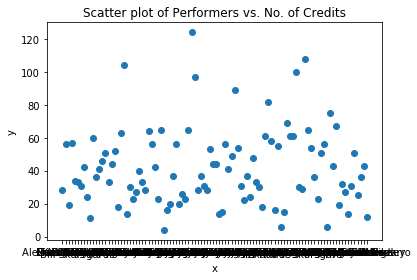

,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_movie
42,124,Jane Austen in Manhattan,1,Sean Young,1959,1980,21


In [398]:
# your code here
x = frame['name']
y = frame['credits']

plt.scatter(x, y)
plt.title('Scatter plot of Performers vs. No. of Credits')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

frame[frame['credits'] > 120]

Sean Young is the most prolific actor on this list with 124 credits

**2.9 [2 pts]** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.

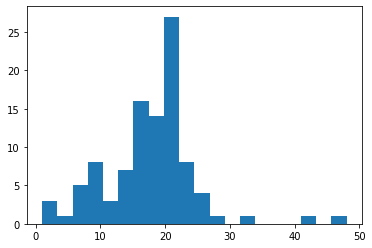

In [405]:
n, bins, patches = plt.hist(frame['age_at_first_movie'], 20)

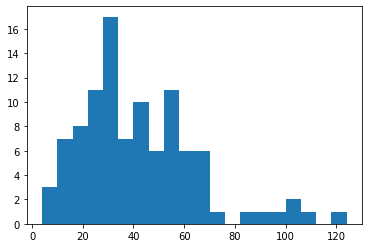

In [401]:
n, bins, patches = plt.hist(frame['credits'], 20)

Seeing the distributions of different variables is interesting, especially age. I didn't expect it to follow an almost normal distribution although it has a few outliers. I also didn't expect the height of the bars at the very young end of the histogram.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Checked by: Marcus Heijer
</footer>